In [1]:
from funcs.notebook import *
from scipy.stats import ks_1samp
from scipy import interpolate

rotper =  4.862 # martioli
orbper =  8.463 # exoplanet.eu

import datetime
tstamp = datetime.date.today().isoformat()

import matplotlib.pyplot as plt

from matplotlib.lines import Line2D

# Synthetic distributions

(0.0, 1.0)

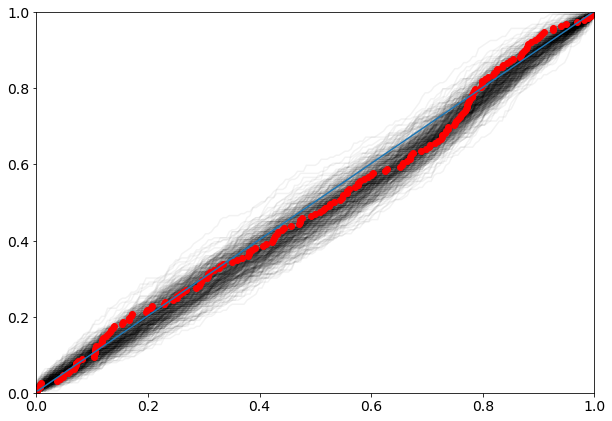

In [2]:
df = pd.read_csv("../results/plots/2021_06_10_AUMic_KS_Test_cumdist_total_Both_Sectors_Orbit.csv")

plt.figure(figsize=(10,7))
for i in range(0,400):

    # one with extra gauss
    random = np.random.rand(174)
    norm = np.random.normal(.78, .08, 15)

    norm[np.where(norm<0)] = 1 + norm[np.where(norm < 0)]

    both = np.append(random, norm)
    cumfreq  = np.histogram(both, bins=len(both))[0].cumsum() / len(both)
    bins = np.linspace(0,1,len(both))
    lin = np.linspace(cumfreq[0],np.max(cumfreq),len(both)-1)
    plt.plot(bins, cumfreq, alpha=.05, c="k",zorder=-10)
    
    # one only uniform
    
    random = np.random.rand(len(both))
    cumfreq  = np.histogram(random, bins=len(both))[0].cumsum()  / len(both)
     
    lin = np.linspace(cumfreq[0],np.max(cumfreq),len(both)-1)
#     plt.plot(bins, cumfreq, alpha=.05, c="r")

plt.scatter(df.phase, df.meas_cum, c="r",marker="o")
    
plt.plot((bins[1:] + bins[:-1]) / 2., lin)
    
plt.xlim(0, 1)
plt.ylim(0, 1)


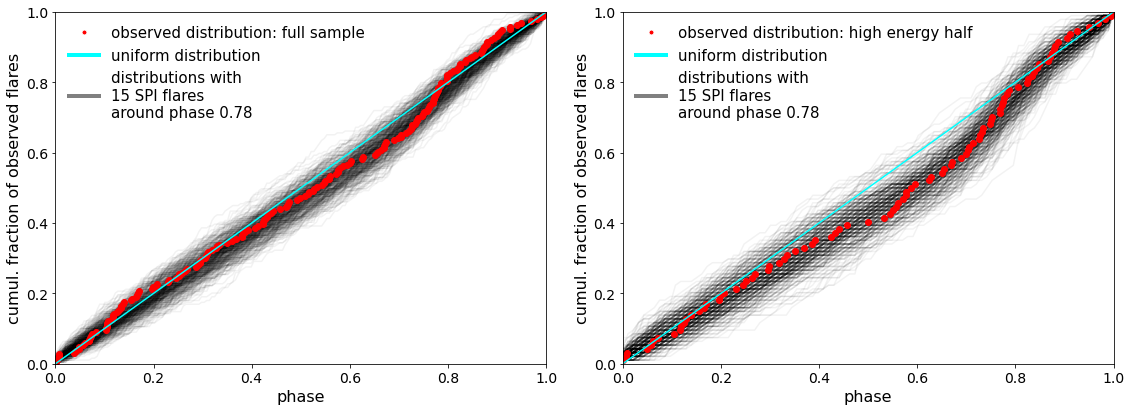

In [3]:
df1 = pd.read_csv("../results/plots/2021_06_10_AUMic_KS_Test_cumdist_total_Both_Sectors_Orbit.csv")
df2 = pd.read_csv("../results/plots/2021_06_10_AUMic_KS_Test_cumdist_high_energy_half_Both_Sectors_Orbit.csv")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))


for ax, df, n, l in [(axes[0], df1,174, "full sample"),
                     (axes[1], df2, 79, "high energy half")]:
    for i in range(0,400):

        # one with extra gauss
        random = np.random.rand(n)
        norm = np.random.normal(.78, .08, 15)

        norm[np.where(norm<0)] = 1 + norm[np.where(norm < 0)]

        both = np.append(random, norm)
        cumfreq  = np.histogram(both, bins=len(both))[0].cumsum() / len(both)
        bins = np.linspace(0,1,len(both))
        lin = np.linspace(cumfreq[0],np.max(cumfreq),len(both)-1)
        ax.plot(bins, cumfreq, alpha=.05, c="k",zorder=-10)

        # one only uniform

        random = np.random.rand(len(both))
        cumfreq  = np.histogram(random, bins=len(both))[0].cumsum()  / len(both)

        lin = np.linspace(cumfreq[0],np.max(cumfreq),len(both)-1)
    #     plt.plot(bins, cumfreq, alpha=.05, c="r")
    ax.plot([0,1],[0,1], c="cyan")
    ax.scatter(df.phase, df.meas_cum, c="r",marker="o")
    

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("phase")
    ax.set_ylabel("cumul. fraction of observed flares")
    
    legend_elements3 = [Line2D([0], [0], marker='o', color='w', 
                              label=f"observed distribution: {l}",
                              markerfacecolor='r', markersize=5),
                        Line2D([0], [0], color='cyan', lw=4, 
                              label=f"uniform distribution"),
                       
                    Line2D([0], [0],color='grey', lw=4,
                              label=f"distributions with\n15 SPI flares\naround phase 0.78"),]
    
    ax.legend(handles=legend_elements3, fontsize=15, frameon=False, loc=2)
plt.tight_layout()
# plt.savefig("../results/plots/2021_06_10_speculative_SPI_spot.png", dpi=300)
# plt.savefig("/home/ekaterina/Documents/002_writing/aumic-flaring-spi-draft/"
#             "figures/2021_06_10_speculative_SPI_spot.png", dpi=300)

Setting ED with new values, size 114.
Setting frequency values with new values, size 114.
Setting frequency adjusted count values with new values, size 114.
Setting ED with new values, size 75.
Setting frequency values with new values, size 75.
Setting frequency adjusted count values with new values, size 75.


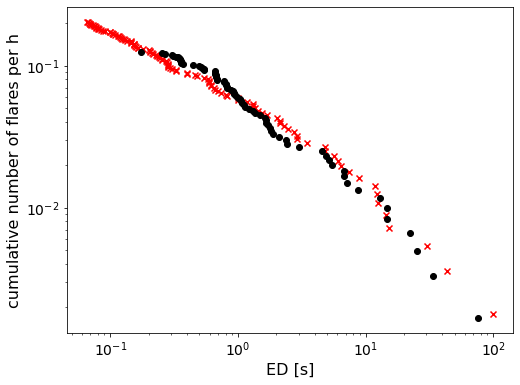

In [10]:
from altaipony.ffd import FFD

aumic1 = pd.read_csv("../results/2021_02_18_AUMic_flares_1.csv")
aumic1 = aumic1[(aumic1.final==1) & (aumic1["real?"]==1)]
aumic27 = pd.read_csv("../results/2021_02_11_AUMic_flares_27.csv")
aumic27 = aumic27[(aumic27.final==1) & (aumic27["real?"]==1)]
aumic = pd.concat([aumic1,aumic27])

aumicphases = pd.DataFrame()

for qcs, cadence in [(27,1/3.),(1,2)]:# 
    lc = pd.read_csv(f"../results/observedtimes/AU Mic_{qcs}_0_TESS.csv")
    counts, bins = np.histogram(lc.phase.values, bins=bins)
    aumicphases[qcs] = counts * cadence

ff1 = FFD(aumic[aumic.qcs == 1], tot_obs_time=aumicphases[1].sum()/60)
ff27 = FFD(aumic[aumic.qcs == 27], tot_obs_time=aumicphases[27].sum()/60)


# ed, freq, counts = ff.ed_and_freq()
plt.figure(figsize=(8, 6))
ed, freq, counts = ff27.ed_and_freq()
plt.scatter(ed, freq, c="r", label="Sector 27", marker="x")
ed, freq, counts = ff1.ed_and_freq()
plt.scatter(ed, freq, c="k", label="Sector 1",)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("ED [s]")
plt.ylabel("cumulative number of flares per h");
plt.savefig("/home/ekaterina/Documents/002_writing/aumic-flaring-spi-draft/figures/2021_06_11_ffd.png", dpi=300)

# AU Mic unbinned statistic rotational phase

In [16]:
aumic1 = pd.read_csv("../results/2021_02_18_AUMic_flares_1.csv")
aumic1 = aumic1[aumic1.final==1]
aumic27 = pd.read_csv("../results/2021_02_11_AUMic_flares_27.csv")
aumic27 = aumic27[aumic27.final==1]
aumic_ = aumic1#pd.concat([aumic1,aumic27])

aumic_["phases"] = (aumic_.tstart % rotper) / rotper

In [18]:
aumic1.shape[0], aumic27.shape[0]

(100, 115)

In [ ]:
# aumic_.shape[0]//2
aumic = aumic_.sort_values(by="ed_rec", ascending=True).iloc[:].sort_values(by="phases", ascending=True)


p = aumic.phases.values
bins = np.zeros(len(p) +1)
bins[0] = p[-1] -1
bins[1:] = p

In [ ]:
aumicphases = pd.DataFrame()

for qcs, cadence in [(1,2)]:#(27,1/3)
    lc = pd.read_csv(f"../results/observedtimes/AU Mic_{qcs}_0_TESS.csv")
    counts, bins = np.histogram((lc.time % rotper) / rotper, bins=bins)
    aumicphases[qcs] = counts * cadence
    

plt.bar((bins[:-1]+bins[1:]) / 2, 
        aumicphases.sum(axis=1).values, 
        width = np.diff(bins),
        facecolor="w", edgecolor="k")
plt.xlim(0,1);

In [ ]:
obstimes = aumicphases.sum(axis=1).values
tot_obs = obstimes.sum()
F = len(obstimes)
tot_obs / 60 / 24

In [ ]:
n_exp = obstimes / tot_obs * F
n_i = np.full_like(obstimes, 1)
cum_n_i = np.cumsum(n_i) / F
cum_n_exp = np.cumsum(obstimes) / tot_obs
cum_n_i.shape

In [ ]:
plt.figure(figsize=(8,7))
a, b, c, d, e, f = np.polyfit(aumic.phases.values, cum_n_exp, 5)
x = np.linspace(0,1,500)
y = a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f
plt.scatter(aumic.phases, cum_n_exp, s=2)
plt.scatter(aumic.phases, cum_n_i, s=15, c="r")
plt.plot(x,y, c="k");
plt.xlim(0,1)
plt.ylim(0,1)

In [ ]:
plt.figure(figsize=(8,7))

plt.scatter(aumic.phases, cum_n_exp, label="expected distribution", c="grey")
plt.scatter(aumic.phases, cum_n_i, c="r", label="measured distribution")
# plt.plot([0,1],[0,1],linestyle="dashed",c="k")
plt.xlabel("phase")
plt.ylabel("cum. observing probability")
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(frameon=False)
plt.title("rotational phase / Sector 27")
# plt.savefig("../results/plots/AUMic_unbinned_KS_rotphase_S27.png", dpi=300);

In [ ]:
g = lambda x: a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f
(ks_1samp(p, g, alternative="greater"),
ks_1samp(p, g, alternative="less"),
ks_1samp(p, g))

# AU Mic unbinned statistic orbital and rotational phase

In [ ]:
#aumic_.shape[0]//2
aumic = aumic_.sort_values(by="ed_rec", ascending=False).iloc[:].sort_values(by="phases", ascending=True)

In [ ]:
p = aumic.phases.values
bins = np.zeros(len(p) +1)
bins[0] = p[-1] -1
bins[1:] = p

In [ ]:
aumicphases = pd.DataFrame()

for qcs, cadence in [(27,1/3.),(1,2)]:# 
    lc = pd.read_csv(f"../results/observedtimes/AU Mic_{qcs}_0_TESS.csv")
    counts, bins = np.histogram(lc.phase.values, bins=bins)
    aumicphases[qcs] = counts * cadence

In [ ]:


plt.bar((bins[:-1]+bins[1:]) / 2, 
        aumicphases.sum(axis=1).values, 
        width = np.diff(bins),
        facecolor="w", edgecolor="k")
plt.xlim(0,1)
# plt.ylim(0,1000)


In [ ]:
obstimes = aumicphases.sum(axis=1).values
tot_obs = obstimes.sum()
F = len(obstimes)
tot_obs / 60 / 24

In [ ]:
n_exp = obstimes / tot_obs * F
n_i = np.full_like(obstimes, 1)
cum_n_i = np.cumsum(n_i) / F
cum_n_exp = np.cumsum(obstimes) / tot_obs
cum_n_i.shape

In [ ]:
plt.figure(figsize=(8,7))
a, b, c, d, e, f = np.polyfit(aumic.phases.values, cum_n_exp, 5)
x = np.linspace(0,1,500)
y = a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f
plt.scatter(aumic.phases, cum_n_exp, s=2)
plt.scatter(aumic.phases, cum_n_i, s=15, c="r")
plt.plot(x,y, c="k");
plt.xlim(0,1)
plt.ylim(0,1)

In [ ]:
plt.figure(figsize=(8,7))

plt.scatter(aumic.phases, cum_n_exp, label="expected distribution", c="grey")
plt.scatter(aumic.phases, cum_n_i, c="r", label="measured distribution")
# plt.plot([0,1],[0,1],linestyle="dashed",c="k")
plt.xlabel("phase")
plt.ylabel("cum. observing probability")
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(frameon=False)
plt.title("orbital phase / both Sectors")
# plt.savefig("../results/plots/AUMic_unbinned_KS_orbphase_bothsectors.png", dpi=300);

In [ ]:
g = lambda x: a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f
(ks_1samp(p, g, alternative="greater"),
ks_1samp(p, g, alternative="less"),
ks_1samp(p, g))

# Meta-analysis

In [ ]:
import matplotlib.patches as mpatches



# Phase coverage and FFDs

In [ ]:
from altaipony.ffd import FFD

ff1 = FFD(aumic[aumic.qcs == 1], tot_obs_time=aumicphases[1].sum())
ff27 = FFD(aumic[aumic.qcs == 27], tot_obs_time=aumicphases[27].sum())


ed, freq, counts = ff.ed_and_freq()
plt.figure(figsize=(8, 6))
ed, freq, counts = ff1.ed_and_freq()
plt.scatter(ed, freq, c="k")
ed, freq, counts = ff27.ed_and_freq()
plt.scatter(ed, freq, c="r")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("ED [s]")
plt.ylabel("cumulative number of flares per min");



In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
aumicphases.plot(kind="bar", ax= ax)

In [ ]:
aumicphases["summe"] = aumicphases[1] + aumicphases[27]
aumicphases["rel1"] = aumicphases[1] / aumicphases["summe"]
aumicphases["rel2"] = aumicphases[27] / aumicphases["summe"]
plt.plot(aumicphases.index, aumicphases["rel1"])
plt.plot(aumicphases.index, aumicphases["rel2"])

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(aumicphases.index, aumicphases["rel1"], 1, label='Sector1')
ax.bar(aumicphases.index, aumicphases["rel2"], 1, bottom=aumicphases["rel1"],
       label='Sector27',facecolor="yellow");


# Basic stats

## ... with orbital phase

In [ ]:
aumic1 = pd.read_csv("../results/2021_02_18_AUMic_flares_1.csv")
aumic1 = aumic1[aumic1.final==1]
aumic27 = pd.read_csv("../results/2021_02_11_AUMic_flares_27.csv")
aumic27 = aumic27[aumic27.final==1]
aumic_ = pd.concat([aumic1,aumic27])


phases = []
for j, row in aumic_.iterrows():
    try:
        lc = pd.read_csv(f"../results/observedtimes/AU Mic_{row.qcs}_0_TESS.csv")
        phases.append(lc.phase[np.argmin(np.abs(lc.time-row.tstart))])
    except Exception as e:
        print(e)
        phases.append(np.nan)

aumic_["phases"] = phases

bins = [0,0.25,0.75,1]
aumicphases = pd.DataFrame()
for qcs, cad in [(1,2),(27,1/3)]:
    lc = pd.read_csv(f"../results/observedtimes/AU Mic_{qcs}_0_TESS.csv")
    counts, bins = np.histogram(lc.phase.values, bins=bins)
    aumicphases[qcs] = counts * cad / 60. / 24.

In [ ]:
obstime = aumicphases.sum(axis=1).values
front_time = obstime[0] + obstime[-1]
back_time = obstime[1]

In [ ]:
(aumic_[(aumic_.phases > .25) & (aumic_.phases < 0.75)].shape[0] / back_time,
 aumic_[(aumic_.phases > .25) & (aumic_.phases < 0.75)].shape[0],
aumic_[(aumic_.phases < .25) | (aumic_.phases > 0.75)].shape[0] / front_time,
aumic_[(aumic_.phases < .25) | (aumic_.phases > 0.75)].shape[0])

## .. with rotational phase

In [ ]:
aumic1 = pd.read_csv("../results/2021_02_18_AUMic_flares_1.csv")
aumic1 = aumic1[aumic1.final==1]
aumic27 = pd.read_csv("../results/2021_02_11_AUMic_flares_27.csv")
aumic27 = aumic27[aumic27.final==1]
aumic_ = pd.concat([aumic1,aumic27])


phases = []
for j, row in aumic_.iterrows():
    try:
        lc = pd.read_csv(f"../results/observedtimes/AU Mic_{row.qcs}_0_TESS.csv")
        phases.append(lc.phase[np.argmin(np.abs(lc.time-row.tstart))])
    except Exception as e:
        print(e)
        phases.append(np.nan)

aumic_["phases"] = phases

bins = [0,0.25,0.75,1]
aumicphases = pd.DataFrame()
for qcs, cad in [(1,2),(27,1/3)]:
    lc = pd.read_csv(f"../results/observedtimes/AU Mic_{qcs}_0_TESS.csv")
    counts, bins = np.histogram(lc.phase.values, bins=bins)
    aumicphases[qcs] = counts * cad / 60. / 24.

# Histograms

In [ ]:
aumic1 = pd.read_csv("../results/2021_02_18_AUMic_flares_1.csv")
aumic27 = pd.read_csv("../results/2021_02_11_AUMic_flares_27.csv")
aumic = pd.concat([aumic1,aumic27])
aumic = aumic[aumic.final==1]

In [ ]:
aumic.shape

In [ ]:
aumic = aumic.sort_values(by="ed_rec", ascending=True)#.iloc[:50]

In [ ]:
from astropy.stats import poisson_conf_interval

In [ ]:
for b in [10,20,40, 80]:
    bins = np.linspace(0,1,b)
    aumicphases = pd.DataFrame()
    for qcs in [1,27]:
        lc = pd.read_csv(f"../results/observedtimes/AU Mic_{qcs}_0_TESS.csv")
        counts, bins = np.histogram(lc.phase.values, bins=bins)
        aumicphases[qcs] = counts
        
        
        
    phases = []
    for j, row in aumic.iterrows():
        try:
            lc = pd.read_csv(f"../results/observedtimes/AU Mic_{row.qcs}_0_TESS.csv")
            phases.append(lc.phase[np.argmin(np.abs(lc.time-row.tstart))])
        except Exception as e:
            print(e)
            phases.append(np.nan)  
            
    counts, bins = np.histogram(phases, bins=bins)

    plt.figure(figsize=(11,7))
    plt.errorbar((bins[:-1]+bins[1:]) / 2,
                 counts / aumicphases.sum(axis=1).values, 
                 yerr = poisson_conf_interval(counts, interval='kraft-burrows-nousek', confidence_level=0.68,
                                              background = counts.sum()/b)/ aumicphases.sum(axis=1).values,#np.sqrt(counts) / aumicphases.sum(axis=1).values,
                 c='k',fmt="o")
    # plt.plot((bins[:-1]+bins[1:]) / 2,lin)
    plt.xlim(0,1)
    plt.ylabel("flare start epochs / all epochs")
    plt.xlabel("orbital phase")
    plt.title("AU Mic")
    # plt.ylim(cumfreq[0],np.max(cumfreq))
#     plt.savefig(f"../results/plots/AUMic_flare_phases_{b}_bins_108_smallest.png", dpi=300)

In [ ]:
counts.sum()

# Model

In [ ]:
def gaussian(mu, sigma, res):
    
    x = np.linspace(0,1,res)
    gauss = lambda x: 1./(sigma * np.sqrt(2*np.pi))*np.exp(-np.power((x - mu)/sigma, 2.)/2)
    f1 = gauss(x)
    x = np.linspace(1,2,res)
    f2 = gauss(x)
    x = np.linspace(-1,0,res)
    f3 = gauss(x)
    return (f1 + f2 + f3)

def model(f, mu, sigma, N, obst):
    g = gaussian(mu, sigma, N) * f
    model = g + (1 - f)
    return model / obst

def logit(function):
    '''Make a probability distribution
    a log probability distribution.'''
    def wrapper(*args, **kwargs):
        result = function(*args, **kwargs)
        np.seterr(divide='ignore') # ignore division by zero because you want to have the -np.inf results
        result = np.log(result)
        return result
    return wrapper



@logit
def uninformative_prior(rate, minrate, maxrate):
    '''Uninformative prior for the rates.
    Uniform within [minrate, maxrate].

    Parameters:
    -------------
    rate : float

    minrate, maxrate : float
        interval in which rate is constrained

    Return:
        Prior probability
    '''
    condition = ~(np.isfinite(maxrate) & np.isfinite(minrate))
    if ((maxrate < minrate) | condition):
        raise ValueError("maxrate must be > minrate, and a finite value")
    if ((rate >= minrate) & (rate <= maxrate)):
        return 1. / (maxrate - minrate)
    else:
        return 0

    

@logit
def circular_uninformative_prior(rate, minrate, maxrate):
    '''Uninformative prior for the rates.
    Uniform within [minrate, maxrate]. Values above

    Parameters:
    -------------
    rate : float

    minrate, maxrate : float
        interval in which rate is constrained

    Return:
        Prior probability
    '''
    condition = ~(np.isfinite(maxrate) & np.isfinite(minrate))
    if ((maxrate < minrate) | condition):
        raise ValueError("maxrate must be > minrate, and a finite value")
        
    if rate < 0:
        rate -= np.floor(rate)
        
    if ((rate%1 >= minrate) & (rate%1 <= maxrate)):
        return 1. / (maxrate - minrate)
    else:
        return 0    



def log_prior(params):

    """

    Parameters:


    """
    f, mu, sigma =  params
    
    prior = (uninformative_prior(f, 0, 1) + 
             uninformative_prior(mu, 0, 1) +  
             uninformative_prior(sigma, 0, 1)) 
    
    return calculate_posterior_value_that_can_be_passed_to_mcmc(prior)



def calculate_posterior_value_that_can_be_passed_to_mcmc(lp):
    '''Do some checks to make sure MCMC will work.'''
    if not np.isfinite(lp):
        return -np.inf
    if np.isnan(lp):
        return -np.inf
    else:
        return lp

    
def log_likelihood(params, N, freq, freq_err, obst):
    """structure of params:

    """
    f, mu, sigma =  params
    m = model(f, mu, sigma, N, obst)
    fr2 = freq_err**2
#     print(fr2)
    val = -0.5 * np.sum((freq - m) ** 2 / fr2 + np.log(fr2))

    return val


def log_probability(params, N, freq, freq_err, obst):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(params, N, freq, freq_err, obst)


In [ ]:
aumic1 = pd.read_csv("../results/2021_02_18_AUMic_flares_1.csv")
aumic27 = pd.read_csv("../results/2021_02_11_AUMic_flares_27.csv")
aumic = pd.concat([aumic1,aumic27])
aumic = aumic[aumic.final==1]

In [ ]:
aumic.shape

In [ ]:
bins = np.linspace(0,1,215)

In [ ]:
aumicphases = pd.DataFrame()

In [ ]:
for qcs in [1,27]:
    lc = pd.read_csv(f"../results/observedtimes/AU Mic_{qcs}_0_TESS.csv")
    counts, bins = np.histogram(lc.phase.values, bins=bins)
    aumicphases[qcs] = counts

In [ ]:
plt.bar((bins[:-1]+bins[1:]) / 2, 
        aumicphases.sum(axis=1).values, 
        width = bins[1]-bins[0],
        facecolor="w", edgecolor="k")
plt.xlim(0,1)

In [ ]:
aumic_lower = aumic.sort_values(by="ed_rec", ascending=True).iloc[:107]
aumic_upper = aumic.sort_values(by="ed_rec", ascending=False).iloc[:108]

In [ ]:
lower_phases, upper_phases, all_phases = [], [], []
for aumic, phases in [(aumic_lower, lower_phases),
                      (aumic_upper, upper_phases),
                      (aumic, all_phases)]:
    for j, row in aumic.iterrows():
        try:
            lc = pd.read_csv(f"../results/observedtimes/AU Mic_{row.qcs}_0_TESS.csv")
            phases.append(lc.phase[np.argmin(np.abs(lc.time-row.tstart))])
        except Exception as e:
            print(e)
            phases.append(np.nan)

In [ ]:
counts, bins = np.histogram(all_phases, bins=bins)
freq = counts / aumicphases.sum(axis=1).values# * (len(bins)/len(all_phases))
freq_err = poisson_conf_interval(counts, interval='kraft-burrows-nousek', confidence_level=0.68,
                                              background = counts.sum()/b)/ aumicphases.sum(axis=1).values
# freq_err, freq

In [ ]:
N = len(bins)-1
f = .1
mu = .77
sigma = 0.05
N

In [ ]:
# plt.plot((bins[1:]+bins[:-1]) / 2, freq)
obst = aumicphases.sum(axis=1).values.mean()
m = model(f, mu, sigma, N, obst) 
plt.plot(np.linspace(0,1,N), m);
plt.errorbar(np.linspace(0,1,N), freq, yerr=freq_err, fmt="o");

In [ ]:
import emcee

pos = np.array([f, mu, sigma]) + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(N, freq, freq_err, obst))
steps=200

In [ ]:
sampler.run_mcmc(pos, steps, progress=True);

In [ ]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["f", "mu", "sigma"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
flat_samples = sampler.get_chain(discard=500, thin=15, flat=True)
print(flat_samples.shape)


In [ ]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, #truths=[f, mu, sigma]
);
plt.savefig(f"../results/plots/model_mcmc_total_mcmc_{f}_{mu}_{sigma}_{N}_{steps}.png", dpi=300)

In [ ]:
N = 210
f = .1
mu = .8
sigma = 0.04
obst = 100
random = np.random.rand(int(np.rint(N * (1 - f))))
norm = np.random.normal(mu, sigma, int(np.rint(N * f)))

norm[np.where(norm<0)] = 1 + norm[np.where(norm < 0)]
norm[np.where(norm>1)] = -1 + norm[np.where(norm > 1)]

                        
both = np.append(random, norm)

counts, bins = np.histogram(both, bins=N)
freq_err = np.maximum(np.sqrt(counts), 1) / obst
freq = counts / obst

In [ ]:
plt.errorbar((bins[1:]+bins[:-1]) / 2, freq, freq_err)
m = model(f, mu, sigma, N, obst)
plt.plot(np.linspace(0,1,N), m);

In [ ]:
# log_likelihood([f, mu, sigma], N, counts, count_err)
log_probability([f, mu, sigma], N, freq, freq_err, obst)

In [ ]:
import emcee

pos = np.array([f, mu, sigma]) + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(N, freq, freq_err, obst))
steps=20000

In [ ]:
sampler.run_mcmc(pos, steps, progress=True);

In [ ]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["f", "mu", "sigma"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
flat_samples = sampler.get_chain(discard=10000, thin=15, flat=True)
print(flat_samples.shape)


In [ ]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[f, mu, sigma]
);
plt.savefig(f"../results/plots/model_mcmc_test_{f}_{mu}_{sigma}_{N}_{steps}.png", dpi=300)

In [ ]:
1.4%1

# Backlog